# Recursos

[GitHub - pinecone-io/examples: Jupyter Notebooks to help you get hands-on with Pinecone vector databases](https://github.com/pinecone-io/examples/tree/master)

In [ ]:
# Instalcion de pinecon
!pip install pinecone-client

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

pinecone_api_key=os.getenv('PINECONE_API_KEY', 'YourAPIKey')
pinecone_environment=os.getenv('PINECONE_ENVIRONMENT', 'YourEnvironment')

# Conceptos basicos

* Vectores y Embeddings


## Inicializacion de pinecone

Una vez creada nuestra cuenta tendremos que crear un proyecto

Damos click en crear proyecto
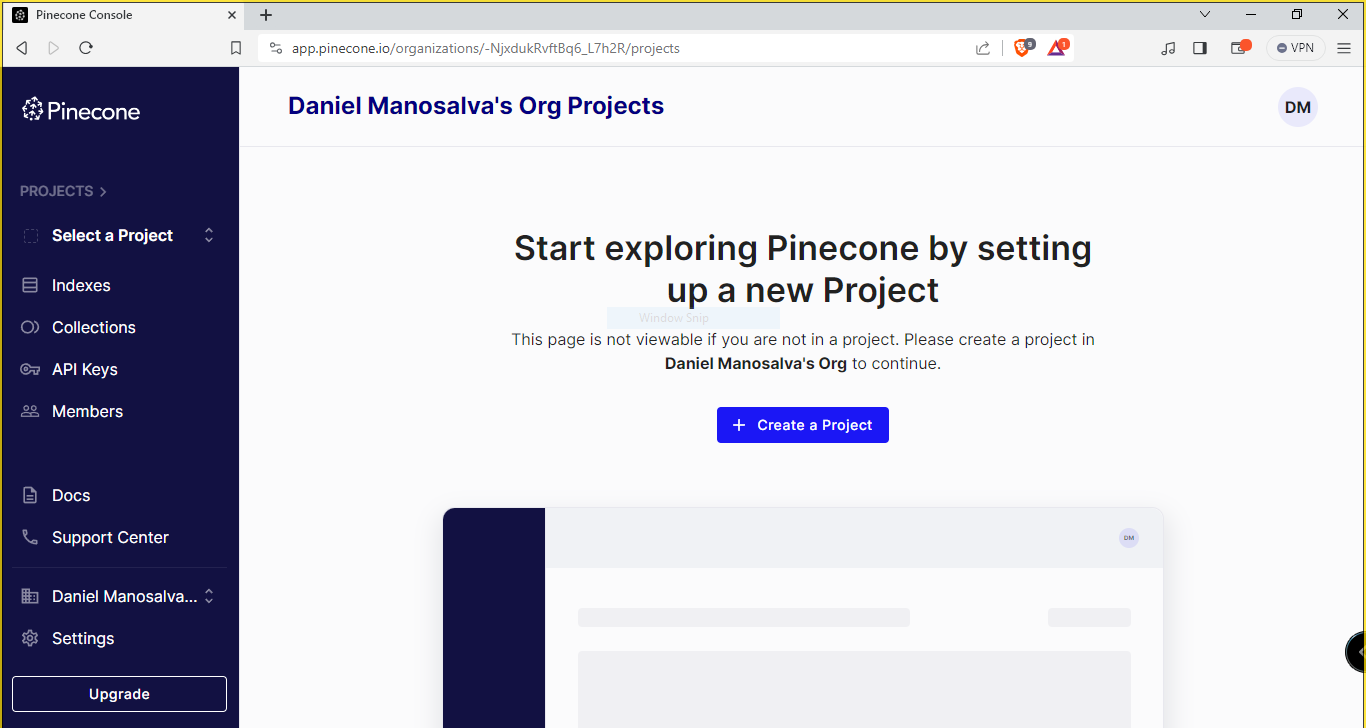

Se nos desplegara un panel donde nos pedira un nombre del proyecto, el entorno de ejecucion y otras opciones para diferentes planes como la creacion de pobs o elegir un proveedor de nube.

Una vez terminada la creacion del proyecto, necesitaremos una clave API y un nombre de entorno para realizar llamadas API a su proyecto Pinecone. Para obtener la clave y el entorno, siga estos pasos:

* Abra la consola de Pinecone.
* Vaya a Claves API.
* Copie su clave de API y su entorno.


In [ ]:
import pinecone

pinecone.init(api_key=pinecone_api_key, environment=pinecone_environment)

## [Indexs](https://docs.pinecone.io/docs/indexes)

En Pinecone, los vectores se almacenan en índices. En cada índice, los vectores comparten la misma dimensionalidad y métrica de distancia para medir la similitud, estos índices de ejecutan en pods.

Los pods son unidades de hardware preconfiguradas para ejecutar un servicio Pinecone. Cada índice se ejecuta en uno o más pods. Generalmente, más pods significan más capacidad de almacenamiento, menor latencia y mayor rendimiento.

Si utiliza el plan de inicio, puede crear un pod con recursos suficientes para soportar aproximadamente 100.000 vectores con incrustaciones y metadatos de 1536 dimensiones; la capacidad es proporcional para otras dimensiones.

### Creacion de indexs

El siguiente indice tiene como nombre ``quickstart`` y tiene 8 dimenciones y como parametro de busqueda estamos usando la distancia euclidiana

#### Codigo

In [4]:
pinecone.create_index("quickstart", dimension=8, metric="euclidean")
pinecone.describe_index("quickstart")

IndexDescription(name='quickstart', metric='euclidean', replicas=1, dimension=8.0, shards=1, pods=1, pod_type='starter', status={'ready': True, 'state': 'Ready'}, metadata_config=None, source_collection='')

#### Plataforma

Luego de haber creado nuestra cuenta en pinecon y nuestro proyecto podemos crear indixes desde su panel solo devemos estar en nuestro proyecto y en el panel laterla seleccionar create index, este nos deplegara un panel donde tendremos que configurar nuestero index

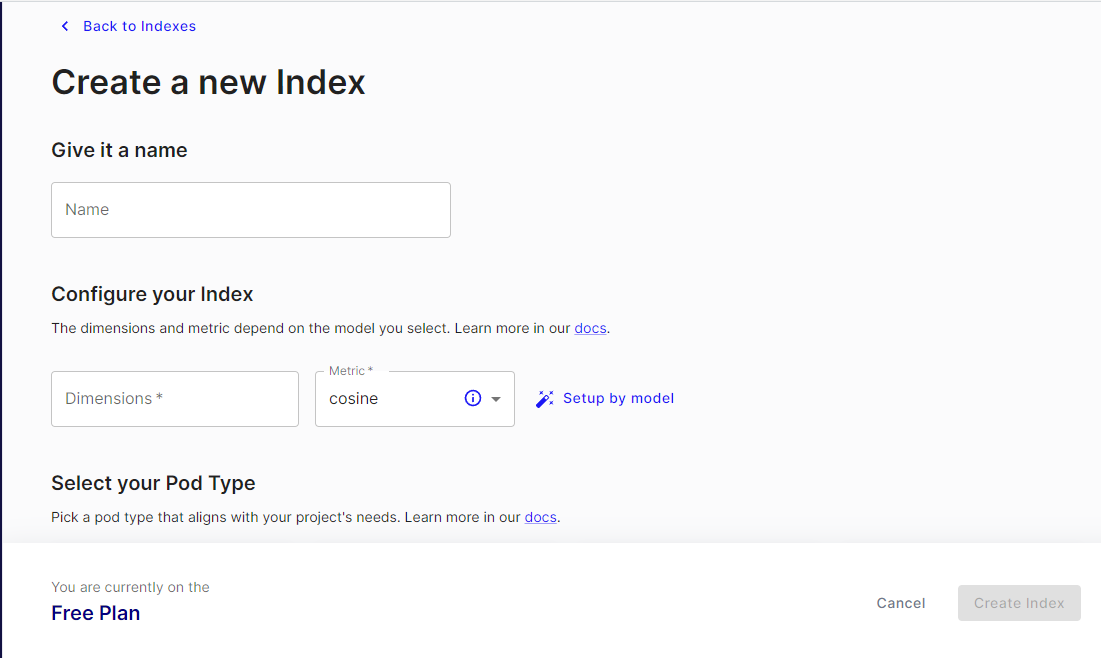

### Listar indexs

In [8]:
pinecone.list_indexes()

['quickstart']

### Insertar vectores


In [10]:
# Seleccionar el indice
index = pinecone.Index("quickstart")

# Insertar vectores
index.upsert(
  vectors=[
    {"id": "A", "values": [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]},
    {"id": "B", "values": [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]},
    {"id": "C", "values": [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]},
    {"id": "D", "values": [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]},
    {"id": "E", "values": [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}
  ]
)

{'upserted_count': 5}

### Ejecutar consultas

In [13]:
index.query(
  vector=[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
  top_k=3,
  include_values=True
)

{'matches': [{'id': 'C',
              'score': 0.0,
              'values': [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]},
             {'id': 'D',
              'score': 0.0799999237,
              'values': [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]},
             {'id': 'B',
              'score': 0.0800000429,
              'values': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]}],
 'namespace': ''}

### Eliminar el indice

In [6]:
pinecone.delete_index("quickstart")

# Colecciones

Una colección es una copia estática de un índice. Es una representación no consultable de un conjunto de vectores y metadatos. Se puede crear una colección a partir de un índice, y se puede crear un nuevo índice a partir de una colección.

## Casos de uso

* Cerrar temporalmente un índice
* Copiar los datos de un índice en otro índice diferente;
* Hacer una copia de seguridad de su índice
* Experimentar con diferentes configuraciones de índices


# Insertar datos

In [7]:
# Creamos un indice con el nombre de "quickstart" y de dimension 8
pinecone.create_index("quickstart", dimension=8, metric="euclidean")

## Datos sin namespace

In [9]:
# Seleccionamos nuestro vector
index = pinecone.Index("quickstart")

# Insertamos vectores con metadata en el indice "quickstart"
index.upsert([
    ("A", [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], {"genre": "comedy", "year": 2020}),
    ("B", [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], {"genre": "documentary", "year": 2019}),
    ("C", [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3], {"genre": "comedy", "year": 2019}),
    ("D", [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4], {"genre": "drama"}),
    ("E", [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], {"genre": "drama"})
])

{'upserted_count': 5}

## Datos con namespace

En este caso los namespace no puede ser usados en la cuenta gratuita pero si quieres aprender más sobre su uso puedes ver los siguientes rescursos

[Uso de namespace](https://github.com/pinecone-io/examples/blob/master/learn/search/namespaces/namespaces_demo.ipynb)
[Doc de namespace](https://docs.pinecone.io/docs/namespaces)

In [ ]:
index.upsert(
    vectors=[
        ("F", [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], {"genre": "rock", "year": 2020}),
        ("G", [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], {"genre": "pop", "year": 2019}),
        ("H", [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3], {"genre": "rap", "year": 2019}),
    ],
    namespace='musica')

## Listar vector

In [15]:
index.describe_index_stats()

{'dimension': 8,
 'index_fullness': 5e-05,
 'namespaces': {'': {'vector_count': 5}},
 'total_vector_count': 5}

Nos da como resultado


```
# {'dimension': 8,
 'index_fullness': 5e-05,
 'namespaces': {'': {'vector_count': 5}},
 'total_vector_count': 5}
```
- `'dimension': 8,` Es el numero de vectores que permite OpenAI
- `'index_fullnes': 5e-05,` Hay vectores 
- `'namespace': {},` son espacios en los cuales puedo trabajar para optimisar el tiempo. eje: en cada vector guardamos distinto tipo de informacion. es decir en un vector de imagenes un namespace podria ser todos los perros, etc... si quisiera buscar algo especifico dentro del index me voy al namespace que quiero buscar en particular
- `'total_vector_count': 5}` cantidad de vectores

# Actualizacion de datos

Como en todas las bases de datos podemos realizar una actualizacion de datos

In [19]:
index.update(id="A", set_metadata={"genre": "accion", "year": 2022})

{}

# Consultas avanzadas

## Consultas por id

In [20]:
index.fetch(ids=["A"])

{'namespace': '',
 'vectors': {'A': {'id': 'A',
                   'metadata': {'genre': 'accion', 'year': 2022.0},
                   'values': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}}}

## Consulta por vectores

Consultaremos un vector en especifico

In [24]:
index.query(
    vector = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
    top_k = 2,
    include_values = True,
    include_metadata = True
)

{'matches': [{'id': 'C',
              'metadata': {'genre': 'comedy', 'year': 2019.0},
              'score': 0.0,
              'values': [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]},
             {'id': 'D',
              'metadata': {'genre': 'drama'},
              'score': 0.0799999237,
              'values': [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]}],
 'namespace': ''}

* En vector entregamos el vector que en este caso es vector2
* ``top k ``seria el numero de vectores mas parecidos, en este caso quiero me entregue los 2 mas parecidos
* ``include_values`` Lista el valor del vector
* ``include_metadata`` Lista los meta datos del vector

## Consulta por filtros de metadata

En las consultas de metadata podemos combinar las operacion AND y OR

* ``$eq`` - Igual a (number, string, boolean)
* ``$ne`` - Diferente (number, string, boolean)
* ``$gt`` - Mayor que (number)
* ``$gte`` - Mayor o igual que (number)
* ``$lt``- Menor que (number)
* ``$lte`` - Menor o igual que (number)
* ``$in``- Pertenece al array (string or number)
* ``$nin`` - No pertenece al array (string or number)

In [28]:
index.query(
    vector = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
    filter={
        "genre": {"$eq": "drama"}
    },
    top_k=2,
    include_metadata=True
)

{'matches': [{'id': 'D',
              'metadata': {'genre': 'drama'},
              'score': 0.0799999237,
              'values': []},
             {'id': 'E',
              'metadata': {'genre': 'drama'},
              'score': 0.319999695,
              'values': []}],
 'namespace': ''}

# Eliminar datos

## Borrar por indice

Podemos borrar varios indices o solo uno

In [30]:
index.delete(ids=['D'])

{}

In [32]:
index.fetch(ids=["D"])

{'namespace': '', 'vectors': {}}

In [34]:
# Cantidad de indices
index.describe_index_stats().total_vector_count

4

## Borrar por filtros

Esta operacion no es soportada en la cuenta gratuita

In [ ]:
index.delete(
    filter={
        "genre": {"$eq": "documentary"},
        "year": 2019
    }
)
index.describe_index_stats().total_vector_count

# Borrar todo

Esta operacion no es soportada en la cuenta gratuita

In [ ]:
index.delete(delete_all=True)